# This is the inital exploration of the college scorecard dataset.


"The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions are preparing their students to be successful. This project provides data to help students and families compare college costs and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and educational goals." The full data documentation can be found in the following link > https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

This will be the initial exploration of the data which includes cleaning the data, sectioning data into relevant dataframes, as well as finding initial estimates of location (mean/median/mode), and some estimates of variability.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,9,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1379,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1412,1413,1427,1428,1431,1432,1433,1517,1532,1533,1534,1535,1536,1537,1538,1539,1540,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1567,1568,1573,1574,1575,1576,1577,1581,1582,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1604,1605,1606,1608,1610,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1

In [3]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,001002,1600.0,9240.0,3090.0,9240.0,3090.0,3090.0,NaN,NaN,0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,...,001052,1200.0,12307.0,5555.0,12307.0,5555.0,5555.0,524675419.0,537349307.0,0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,016885,900.0,NaN,NaN,9600.0,1600.0,1600.0,174804.0,174805.0,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,001055,2120.0,10400.0,3994.0,10400.0,3994.0,3994.0,79465021.0,77250279.0,1
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,001005,1600.0,6050.0,3392.0,7320.0,4228.0,4228.0,99638681.0,94536751.0,0


In [4]:
# Look at the shape of the dataframe
df.shape

(6694, 2392)

In [6]:
#Select relevant columns
master_df = df[["UNITID", "INSTNM", "STABBR", "ZIP", "CITY", "ICLEVEL", "HIGHDEG",
                "COSTT4_A", "TUITIONFEE_IN"]]

In [7]:
# Drop all data that is above 1 in ICLEVEL to select only 4-year universities
master_df.drop(master_df[master_df.ICLEVEL > 1].index, inplace=True)

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
#Check null data
master_df.isnull().sum()

UNITID             0
INSTNM             0
STABBR             0
ZIP                0
CITY               0
ICLEVEL            0
HIGHDEG            0
COSTT4_A         897
TUITIONFEE_IN    541
dtype: int64

In [9]:
master_df[master_df.isnull().any(axis=1)]

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN
7,100812,Athens State University,AL,35611,Athens,1,4,NaN,NaN
54,102395,United States Sports Academy,AL,36526-7055,Daphne,1,4,NaN,NaN
69,104090,Brookline College-Phoenix,AZ,85021,Phoenix,1,4,NaN,NaN
82,104665,The School of Architecture,AZ,85253,Paradise Valley,1,4,NaN,NaN
92,105367,Ottawa University-Phoenix,AZ,85021,Phoenix,1,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6685,48511109,Georgia Military College - Madison,GA,306501349,Madison,1,0,NaN,6165.0
6686,48511110,Georgia Military College - Stone Mountain,GA,300833070,Stone Mountain,1,0,NaN,6165.0
6687,48511111,Georgia Military College - Fayetteville,GA,302144280,Fayetteville,1,0,NaN,6165.0
6688,48511112,Georgia Military College - Dublin,GA,310215149,Dublin,1,0,NaN,6165.0


In [10]:
#drop rows that have NA values
master_df.dropna(how='any', inplace=True)

<ipython-input-10-29dcb523820d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.dropna(how='any', inplace=True)


In [11]:
master_df.shape

(2212, 9)

In [11]:
# Drop US territories such as Puerto Rico
#master_df.drop(master_df[master_df.ICLEVEL > 1].index, inplace=True)
master_df.drop(master_df[master_df.PREDDEG < 2].index, inplace=True)
#(["AS", "FM", "GU", "MA", "MH", "MP", "PR", "PW"]))

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#master_df.drop(master_df[master_df.STABBR == "PR"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "AS"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "FM"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "GU"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "MH"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "MP"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "PR"].index, inplace=True)
master_df.drop(master_df[master_df.STABBR == "PW"].index, inplace=True)

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
#look at descriptive statistics
master_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNITID,2144.0,219196.722948,102995.500012,100654.0,155052.00,195168.5,228173.25,494171.0
ICLEVEL,2144.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
HIGHDEG,2144.0,3.667444,0.544727,0.0,3.00,4.0,4.00,4.0
COSTT4_A,2144.0,34104.257929,16488.010508,6525.0,21378.75,29334.0,45256.25,78555.0
TUITIONFEE_IN,2144.0,21706.530784,14963.971419,480.0,9277.25,16605.0,32558.75,61788.0


# Questions of interest

- What is the average cost of attendance in the US?
    - Repeat for community college, 4-year university, private, and public.
- Write function that will allow the user to select a state of interest and output the mean, trimmed mean, median, mode, standard deviation, and percentile within the US.
    - Include output for community college and 4-year university, private and public.

In [15]:
master_df.head()

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN
0,100654,Alabama A & M University,AL,35762,Normal,1,4,23053.0,10024.0
1,100663,University of Alabama at Birmingham,AL,35294-0110,Birmingham,1,4,24495.0,8568.0
2,100690,Amridge University,AL,36117-3553,Montgomery,1,4,14800.0,6950.0
3,100706,University of Alabama in Huntsville,AL,35899,Huntsville,1,4,23917.0,11122.0
4,100724,Alabama State University,AL,36104-0271,Montgomery,1,4,21866.0,11068.0


In [16]:
# US mean
master_df["COSTT4_A"].mean()

34104.257929104475

In [17]:
#US trimmed mean
from scipy.stats import trim_mean

trim_mean(master_df["COSTT4_A"], 0.1)

32588.174825174825

In [18]:
# US Median
master_df["COSTT4_A"].median()

29334.0

In [21]:
deg_df = master_df.groupby("HIGHDEG").mean()
deg_df.head()

,UNITID,ICLEVEL,COSTT4_A,TUITIONFEE_IN
HIGHDEG,,,,
0,400468.000000,1.0,19666.800000,10302.000000
1,188942.000000,1.0,19186.000000,7800.000000
2,273937.595745,1.0,18795.042553,9073.042553
3,242975.525168,1.0,29958.835570,18906.134228
4,207410.041472,1.0,36296.438796,23267.560535


- The average cost of attendance for one year in all higher ed institutions in the US is 27,548 dollars.
- Associates degree is 15,553 dollars.
- Bachelors degree is 29,196 dollars.
- Graduate degree is 35,702 dollars.

* The average cost for attendance  for 4 years in all higher ed institutions in the US is 110,192 USD
* Associates degree: 31,106 USD (2 years)
* Bachelors degree: 116,784 USD (4 years
* Graduate Degree: 71,404 USD (2 years)

## Estimates of Variability (Dispersion Metrics)

**Deviations**: The difference between observed values and the estimate of location. Also called Errors of Residuals

**Variance**: Square the deviations from the mean, divide by n-1 where n is the number of instances

In [22]:
#What is the variance in the cost of attendance?
from statistics import variance

variance(master_df["COSTT4_A"])

271854490.5134695

In [23]:
#Standard deviation
from statistics import stdev

stdev(master_df["COSTT4_A"])

16488.01050804704

In [24]:
# Mean absolute deviation

np.mean(np.absolute(master_df["COSTT4_A"] - np.mean(master_df["COSTT4_A"])))

13795.646568782839

In [25]:
# Median absolute deviation

np.median(np.absolute(master_df["COSTT4_A"] - np.median(master_df["COSTT4_A"])))

10686.5

In [26]:
# interquartile range

q3, q1 = np.percentile(master_df["COSTT4_A"], [75, 25])
iqr = q3 - q1
iqr

23877.5

## Exploring the Data Distribution

<AxesSubplot:>

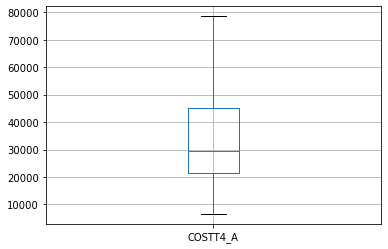

In [27]:
#Percentiles and boxplots

master_df.boxplot(column="COSTT4_A", by=None, ax=None)

#Data looks positively skewed

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


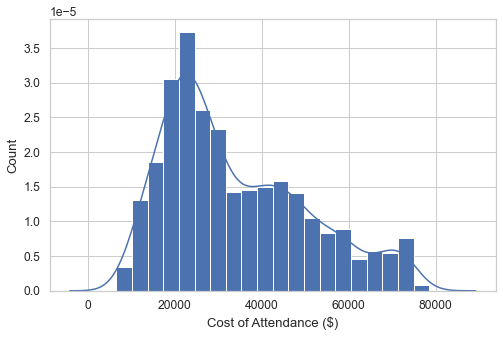

In [28]:
# Frequency plot

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    master_df['COSTT4_A'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Cost of Attendance ($)', ylabel='Count');

## Exploring Binary and Categorical Data

In [29]:
# Mode

master_df['COSTT4_A'].mode()

0    28149.0
dtype: float64

(65000.0, 85000.0)

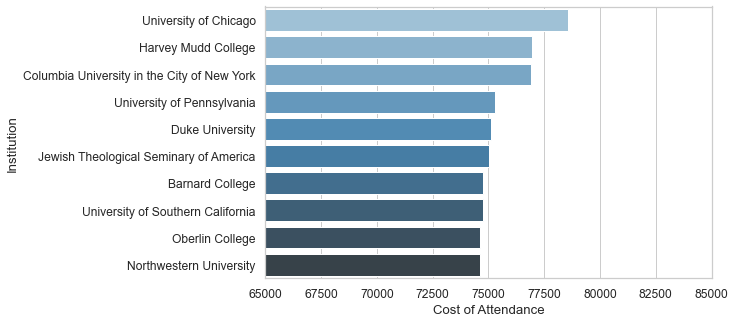

In [32]:
# Bar Plot- plotting top 10 most expensive institutions

top10high = master_df.nlargest(n=10, columns=["COSTT4_A"])

ax = sns.barplot(data=top10high, y="INSTNM", x="COSTT4_A", orient="h", palette="Blues_d")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")
ax.set_xlim(left=65000, right=85000)

Text(0.5, 0, 'Cost of Attendance')

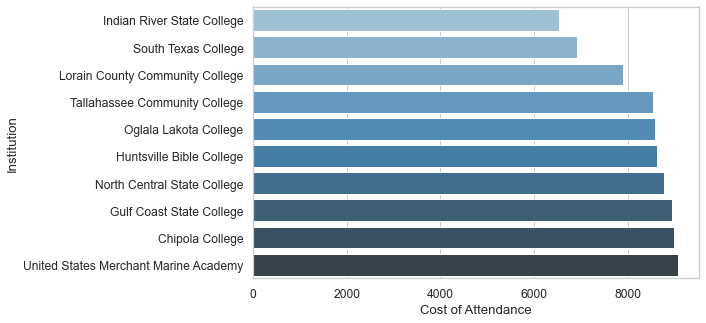

In [33]:
# Plotting the 10 least expensive institutions

top10low = master_df.nsmallest(n=10, columns=["COSTT4_A"])

ax = sns.barplot(data=top10low, y="INSTNM", x="COSTT4_A", orient="h", palette="Blues_d")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")

# Correlation

In [34]:
# Correlation matrix

master_df.corr()

,UNITID,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN
UNITID,1.000000,NaN,-0.190070,-0.180963,-0.182111
ICLEVEL,NaN,NaN,NaN,NaN,NaN
HIGHDEG,-0.190070,NaN,1.000000,0.220459,0.178976
COSTT4_A,-0.180963,NaN,0.220459,1.000000,0.976375
TUITIONFEE_IN,-0.182111,NaN,0.178976,0.976375,1.000000


- It seems that the cost of attendance has a strong correlation with in state and out of state tuition

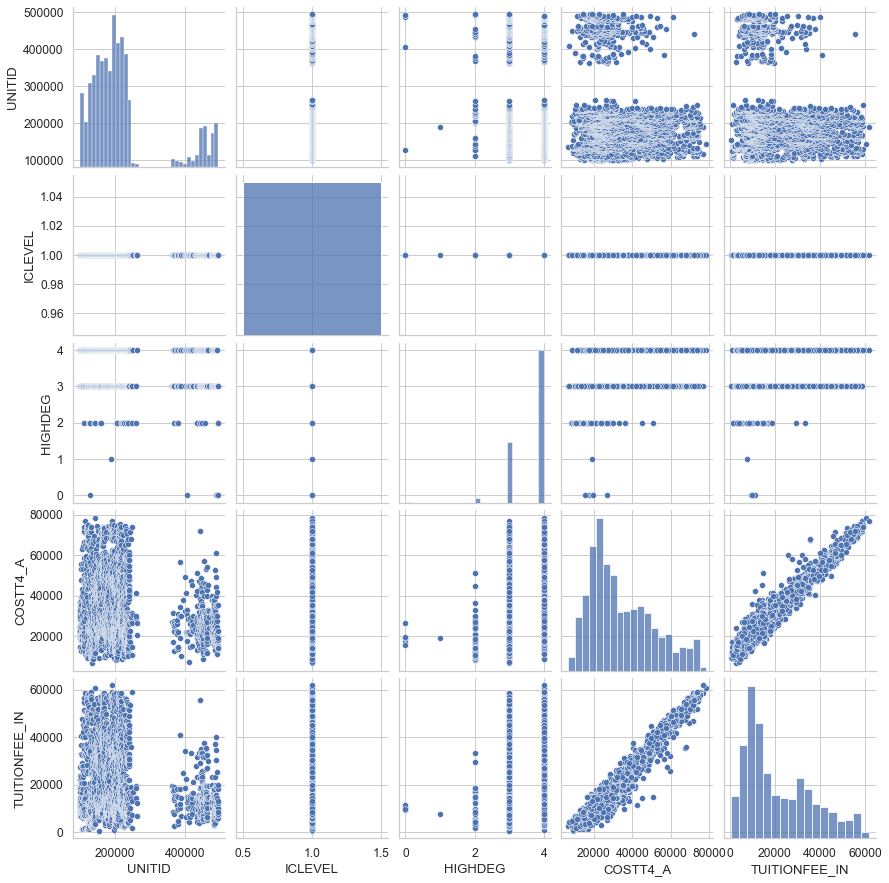

In [35]:
# Scatterplot

sns.pairplot(data=master_df)

- Strong correlation between in-state/out-state tuition and cost of attendance

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COSTT4_A', ylabel='TUITIONFEE_IN'>

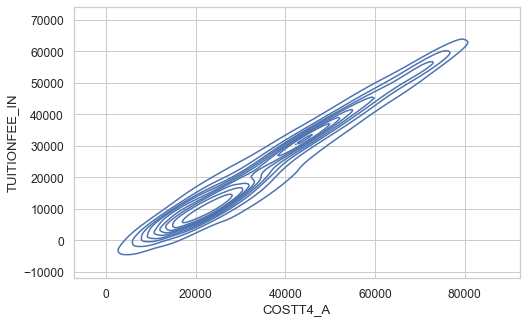

In [36]:
# Contour plot

ax = sns.kdeplot(master_df["COSTT4_A"], master_df["TUITIONFEE_IN"])
ax

<AxesSubplot:xlabel='COSTT4_A'>

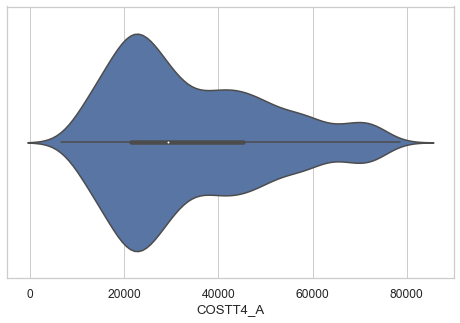

In [38]:
# Violin plot

sns.violinplot(x=master_df["COSTT4_A"])

In [39]:
# Export cleaned df for further analysis
master_df.to_csv("cleaned_cost_data", index=False)